In [15]:
# Langkah 1: Import library yang diperlukan
import pandas as pd
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt
import os


In [7]:
# Langkah 2: Load dataset
# Pastikan Anda mengganti 'covid19_cfr.csv' dengan nama file yang sesuai.
data = pd.read_csv('covid19_cfr.csv')

# Tampilkan beberapa baris awal dataset untuk memastikan data ter-load dengan benar
print(data.head())


                     provinsi  kepadatan2019  jumlahpenduduk2020  \
0                        Aceh             93             5388100   
1                        Bali            750             4414400   
2                      Banten           1338            12895300   
3                    Bengkulu            100             1994300   
4  Daerah Istimewa Yogyakarta           1227             3919200   

   rerataaktif03sd11  rerataterkonfirmasi03sd11  reratasembuh03sd11  \
0         17266.7778                 45499.5556          26577.4444   
1         13687.0000                101577.7778          85267.1111   
2         20126.0000                 72602.1111          49701.7778   
3          2231.6667                  8126.1111           5434.7778   
4          6534.4444                 29471.5556          22154.3333   

   reratameninggal03sd11  rasioaktif  rasioterkonfrimasi  rasiosembuh  \
0              1655.6667     34.6722             13.1579      22.5258   
1              262

In [8]:
# Langkah 3: Pilih fitur numerik untuk clustering
numeric_columns = data.select_dtypes(include=['float64', 'int64']).columns
print("Kolom numerik yang digunakan untuk clustering:", numeric_columns)
data_numeric = data[numeric_columns]


Kolom numerik yang digunakan untuk clustering: Index(['kepadatan2019', 'jumlahpenduduk2020', 'rerataaktif03sd11',
       'rerataterkonfirmasi03sd11', 'reratasembuh03sd11',
       'reratameninggal03sd11', 'rasioaktif', 'rasioterkonfrimasi',
       'rasiosembuh', 'rasiomeninggal', 'reratacrf', 'reratari'],
      dtype='object')


In [9]:
# Langkah 4: Normalisasi data numerik
scaler = StandardScaler()
data_normalized = scaler.fit_transform(data_numeric)


C:\Users\bimoc\AppData\Local\Programs\Python\Python312\Lib\site-packages\joblib\externals\loky\backend\context.py:136: UserWarning: Could not find the number of physical cores for the following reason:
found 0 physical cores < 1
Returning the number of logical cores instead. You can silence this warning by setting LOKY_MAX_CPU_COUNT to the number of cores you want to use.
  warnings.warn(
  File "C:\Users\bimoc\AppData\Local\Programs\Python\Python312\Lib\site-packages\joblib\externals\loky\backend\context.py", line 282, in _count_physical_cores
    raise ValueError(f"found {cpu_count_physical} physical cores < 1")


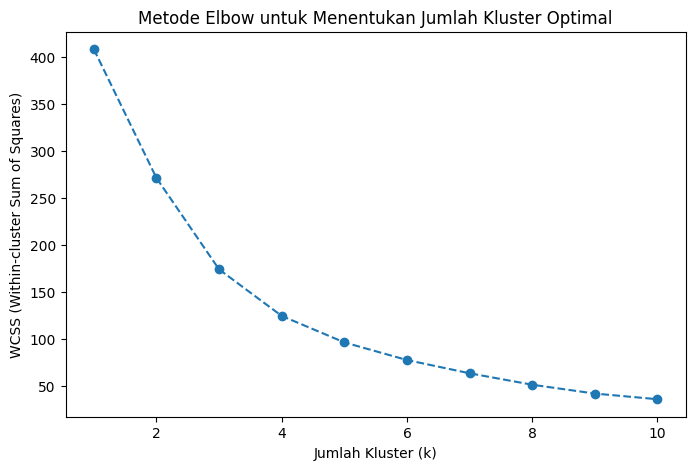

In [10]:
# Langkah 5: Menentukan jumlah kluster menggunakan metode Elbow
wcss = []  # Within-cluster sum of squares
range_k = range(1, 11)  # Uji untuk 1 hingga 10 kluster

for k in range_k:
    kmeans = KMeans(n_clusters=k, random_state=42, n_init=10)
    kmeans.fit(data_normalized)
    wcss.append(kmeans.inertia_)

# Visualisasi metode Elbow
plt.figure(figsize=(8, 5))
plt.plot(range_k, wcss, marker='o', linestyle='--')
plt.xlabel('Jumlah Kluster (k)')
plt.ylabel('WCSS (Within-cluster Sum of Squares)')
plt.title('Metode Elbow untuk Menentukan Jumlah Kluster Optimal')
plt.show()


In [11]:
# Langkah 6: Clustering dengan jumlah kluster optimal
# (Ganti `n_clusters` dengan jumlah kluster yang dipilih dari grafik elbow)
optimal_k = 3  # Contoh, jika jumlah kluster optimal adalah 3
kmeans = KMeans(n_clusters=optimal_k, random_state=42, n_init=10)
clusters = kmeans.fit_predict(data_normalized)


In [12]:
# Tambahkan hasil clustering ke dalam dataset asli
data['Cluster'] = clusters

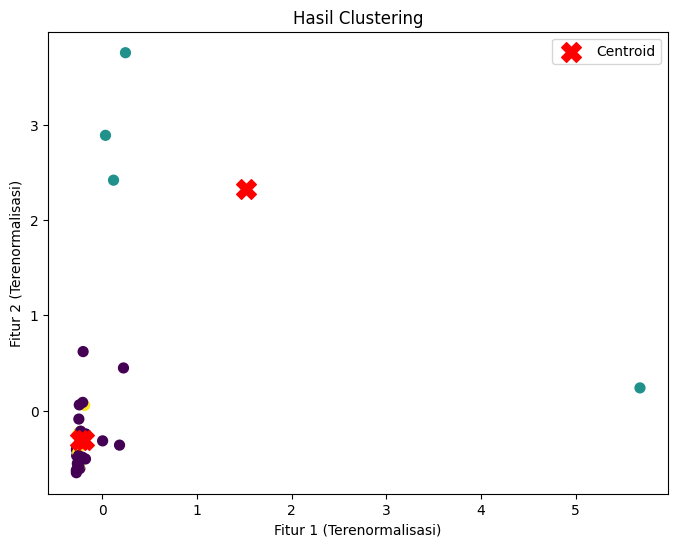

In [13]:
# Langkah 7: Visualisasi hasil clustering (jika memungkinkan)
plt.figure(figsize=(8, 6))
plt.scatter(data_normalized[:, 0], data_normalized[:, 1], c=clusters, cmap='viridis', s=50)
plt.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:, 1], c='red', marker='X', s=200, label='Centroid')
plt.title('Hasil Clustering')
plt.xlabel('Fitur 1 (Terenormalisasi)')
plt.ylabel('Fitur 2 (Terenormalisasi)')
plt.legend()
plt.show()


In [14]:
# Langkah 8: Simpan hasil clustering ke file baru
data.to_csv('hasil_clustering.csv', index=False)
print("Hasil clustering telah disimpan ke 'hasil_clustering.csv'.")

Hasil clustering telah disimpan ke 'hasil_clustering.csv'.
